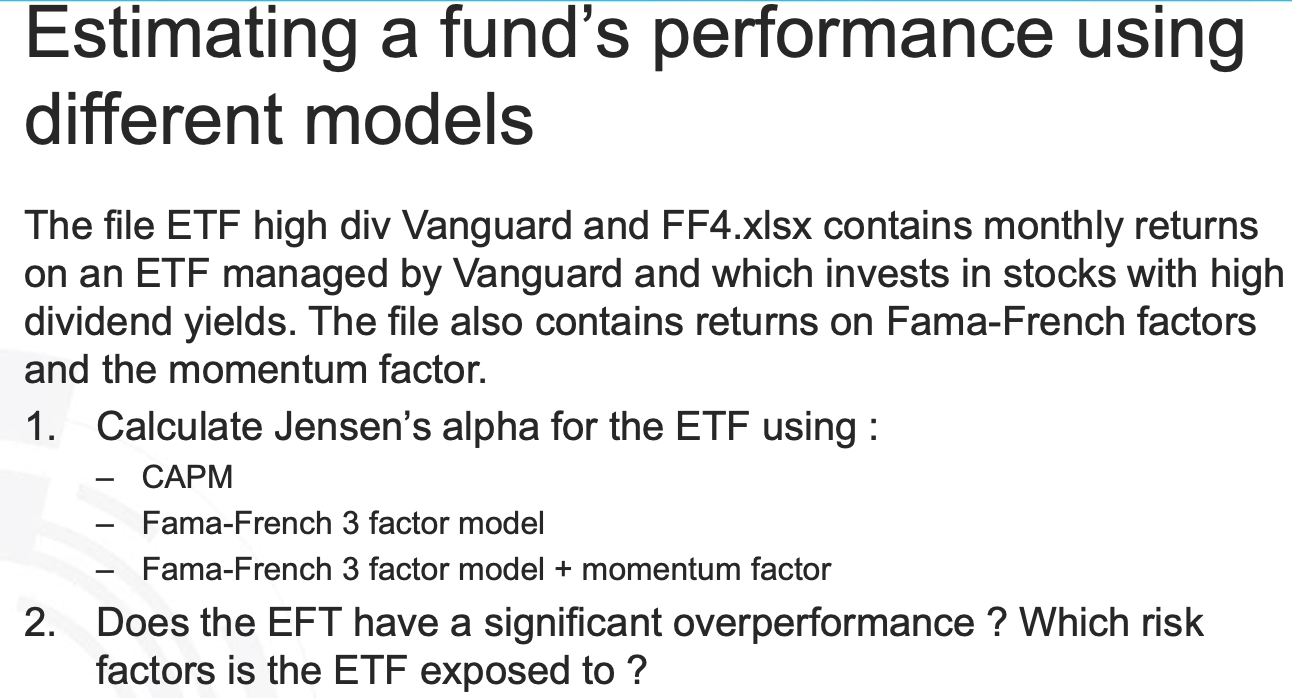

In [2]:
import pandas as pd

df = pd.read_excel("/Users/hirecheariles/Documents/Cours/Master Finance/IFM/Chap4/ETF high div Vanguard and FF4.xlsm", index_col="date").iloc[:,1:9]  #Only importing the useful columns, while keeping all the rows

df.index=pd.to_datetime(df.index.astype("float64"), format="%Y%m%d")  #Changing the index type from float to datetime
df

,PRC,RET,rp-rf,rm-rf,SMB,HML,UMD,rf
date,,,,,,,,
2007-01-31,52.000,0.005608,0.001208,0.0140,0.0010,-0.0013,0.0024,0.0044
2007-02-28,51.190,-0.015577,-0.019377,-0.0196,0.0132,-0.0010,-0.0133,0.0038
2007-03-30,51.560,0.012463,0.008163,0.0068,-0.0006,-0.0023,0.0247,0.0043
2007-04-30,53.741,0.042300,0.037900,0.0349,-0.0207,-0.0115,-0.0016,0.0044
2007-05-31,55.360,0.030126,0.026026,0.0324,-0.0001,-0.0007,-0.0027,0.0041
...,...,...,...,...,...,...,...,...
2016-08-31,72.920,-0.003008,-0.003208,0.0050,0.0094,0.0318,-0.0316,0.0002
2016-09-30,72.140,-0.004073,-0.004273,0.0025,0.0200,-0.0134,-0.0052,0.0002
2016-10-31,71.220,-0.012753,-0.012953,-0.0202,-0.0441,0.0415,0.0058,0.0002


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 120 entries, 2007-01-31 to 2016-12-30
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRC     120 non-null    float64
 1   RET     120 non-null    float64
 2   rp-rf   120 non-null    float64
 3   rm-rf   120 non-null    float64
 4   SMB     120 non-null    float64
 5   HML     120 non-null    float64
 6   UMD     120 non-null    float64
 7   rf      120 non-null    float64
dtypes: float64(8)
memory usage: 8.4 KB


In [4]:
import statsmodels.api as sm

X = df[["rm-rf", "SMB", "HML", "UMD"]] #Explanatory variables for the Fama French 3 factor model + Momentum factor
y=df["rp-rf"]

mdl = sm.OLS(y, sm.add_constant(X)).fit() #Running OLS
mdl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  rp-rf   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.935
Method:                 Least Squares   F-statistic:                     431.5
Date:                Wed, 03 Dec 2025   Prob (F-statistic):           3.09e-68
Time:                        19:50:38   Log-Likelihood:                 374.65
No. Observations:                 120   AIC:                            -739.3
Df Residuals:                     115   BIC:                            -725.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0011      0.001      1.076      0.284      -0.001       0.003
rm-rf          0.8865      0.026     34.758      0.000       0.836       0.937
SMB           -0.2908      0.047     -6.155      0.000      -0.384      -0.197
HML            0.2669      0.041      6.445      0.000       0.185       0.349
UMD           -0.0118      0.023     -0.516      0.607      -0.057       0.034
==============================================================================
Omnibus:                        1.701   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.427   Jarque-Bera (JB):                1.399
Skew:                          -0.262   Prob(JB):                        0.497
Kurtosis:                       3.071   Cond. No.                         48.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

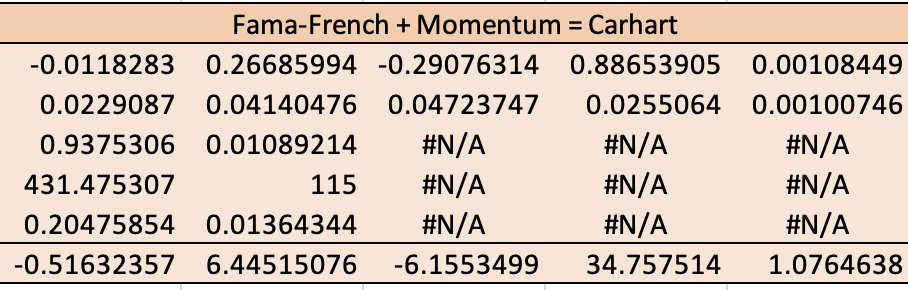

In [5]:
df.head()

,PRC,RET,rp-rf,rm-rf,SMB,HML,UMD,rf
date,,,,,,,,
2007-01-31,52.000,0.005608,0.001208,0.0140,0.0010,-0.0013,0.0024,0.0044
2007-02-28,51.190,-0.015577,-0.019377,-0.0196,0.0132,-0.0010,-0.0133,0.0038
2007-03-30,51.560,0.012463,0.008163,0.0068,-0.0006,-0.0023,0.0247,0.0043
2007-04-30,53.741,0.042300,0.037900,0.0349,-0.0207,-0.0115,-0.0016,0.0044
2007-05-31,55.360,0.030126,0.026026,0.0324,-0.0001,-0.0007,-0.0027,0.0041


In [6]:
import numpy as np

mean_exc_ret_mark = df["rm-rf"].mean()
mean_exc_ret_etf = df["rp-rf"].mean()

den = np.sum( (df["rm-rf"] - mean_exc_ret_mark)**2 )

num = np.sum( (df["rp-rf"]-mean_exc_ret_etf) * (df["rm-rf"]-mean_exc_ret_mark) )

print( num / (len(df)-1) )  #Dividing by T-1 to find the empirical covariance
print( np.cov(list(df["rm-rf"]), list(df["rp-rf"]))[0][1] )  #Covariance with np.cov(srs1, srs2)

print("\nVariance of market's excess returns:", den / (len(df)-1) ) #Dividing by T-1 to find the empirical variance

print("\nBeta1 de l'ETF:", num/den)  #Beta1hat .i.e Beta of the ETF

0.0018348309991596636
0.001834830999159664

Variance of market's excess returns: 0.0020558056967787115

Beta1 de l'ETF: 0.892511876017613


np.cov(srs1, srs2) retrieves one dof here, I guess it always does it with one and doesn't adjust

np.cov(list1, list2) is also valid, this function returns a 2x2 array (var-cov matrix)

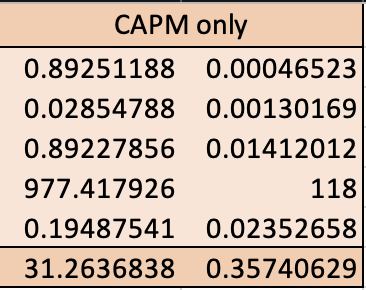

In [7]:
import scipy.stats as sps

print(sps.t.ppf(0.975, len(df)-2)) # The quantile we're comparing to

sps.norm.ppf(0.975) # If n tends towards infinity

1.9802722492407059


1.959963984540054

We want to test if the alpha is higher than 0, so we'll perform a unilateral test at a 5% first order risk level.
Using a highest level of risk (5% instead of 1% usually in finance), and doing a unilateral test (comparing with a quantile letting more distribution on the right tail (5% instead of 2.5%) ) allows to get the lowest quantile possible, such that it'll be more likely that the Stat is higher than it.

We use the highest degrees of freedom (the one from the capm test), to have the lowest 95% quantile and
eventually accept the alternative hypothesis of significance.

In [13]:
print("Alpha hat:", mdl.params.iloc[0], "Its standard deviation:", mdl.bse.iloc[0])

print("\nThe stat", mdl.params.iloc[0]/mdl.bse.iloc[0] , "is lower than", sps.t.ppf(0.975, len(df)-2) )

Alpha hat: 0.0010844916232214835 Its standard deviation: 0.0010074575889532473

The stat 1.0764637986878185 is lower than 1.9802722492407059
